In [113]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import healpy as hp
from orphics import maps, stats, cosmology

import sys, os
sys.path.append("/global/homes/h/hongbo/tools/cmblensplus/wrap")
import curvedsky
from math import pi
import matplotlib as mpl
mpl.rcParams['font.size']=13

In [114]:
recon_ps_dir = '../output/recon_ps/'
import matplotlib as mpl
mpl.rcParams['font.size']=12

In [115]:
lmax = 6000
ellmax = 3000
ells = np.arange(0, ellmax+1)
factor = ells*(ells+1)/(2*pi)
Tcmb  = 2.726e6 

In [116]:
teb_alm = hp.read_alm(f"../simMaps/CMBLensed_fullsky_alm_000.fits", hdu=(1,2,3)) 
kap_alm = hp.read_alm(f"../simMaps/kappa_fullsky_alm_000.fits")

In [117]:
theory = cosmology.default_theory()
ls = np.arange(0, lmax+1)
clee = theory.lCl('EE',ls)
clbb = theory.lCl('BB',ls)

In [118]:
clee[0] = 1
clee[1] = 1
clbb[0] = 1
clbb[1] = 1

In [119]:
Elm = hp.almxfl(teb_alm[1], 1/clee)
Blm = hp.almxfl(teb_alm[2], 1/clbb)

In [120]:
Elm_hpx = curvedsky.utils.lm_healpy2healpix(Elm, lmax)
Blm_hpx = curvedsky.utils.lm_healpy2healpix(Blm, lmax)
kap_alm_hpx = curvedsky.utils.lm_healpy2healpix(kap_alm, lmax)

In [121]:
clee_input = hp.alm2cl(np.complex128(teb_alm[1]))

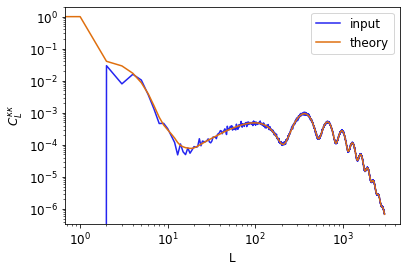

In [122]:
plt.plot(ells, clee_input[ells], label='input')
#plt.plot(ells, clee_input_hpx[ells], label='input hpx')
plt.plot(ells, clee[ells], label='theory')
plt.xlabel('L')
plt.ylabel('$C_L^{\kappa\kappa}$')
plt.legend()
plt.xscale('log')
plt.yscale('log')

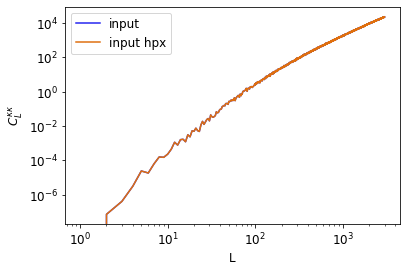

In [123]:
clkk_input = hp.alm2cl(kap_alm)
clkk_input_hpx = curvedsky.utils.alm2cl(ellmax, kap_alm_hpx[:ellmax+1, :ellmax+1])
plt.plot(ells, clkk_input[ells], label='input')
plt.plot(ells, clkk_input_hpx[ells], label='input hpx')
plt.xlabel('L')
plt.ylabel('$C_L^{\kappa\kappa}$')
plt.legend()
plt.xscale('log')
plt.yscale('log')

In [133]:
reckap_alm = curvedsky.rec_lens.qeb(ellmax, ellmax, ellmax, clee[:ellmax+1], \
                                    Elm_hpx[:ellmax+1,:ellmax+1], Blm_hpx[:ellmax+1,:ellmax+1],\
                                    gtype='k', nside_t=1024)

Al = curvedsky.norm_quad.qeb('lens', ellmax, ellmax, ellmax, clee[:ellmax+1],\
                             clee[:ellmax+1], clbb[:ellmax+1], lfac='k')

reckap_alm *=Al[0][:,None]

In [134]:
EB_inkap_x_reckap = curvedsky.utils.alm2cl(ellmax, kap_alm_hpx[:ellmax+1, :ellmax+1], reckap_alm[0])
EB_reckap_x_reckap = curvedsky.utils.alm2cl(ellmax, reckap_alm[0])

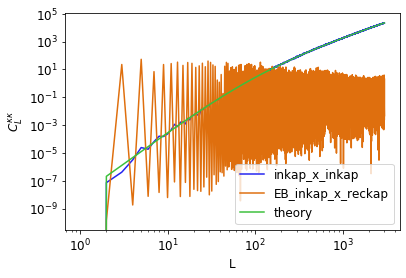

In [ ]:
clpp = np.loadtxt('../inputPs/cosmo2017_10K_acc3_lenspotentialCls.dat', usecols=5, unpack=True)
clpp = np.concatenate(([0,0],clpp))
clkk = clpp[ells]*ells**4/4

plt.plot(ells, clkk_input[ells], label='inkap_x_inkap')
plt.plot(ells, abs(EB_inkap_x_reckap), label='EB_inkap_x_reckap')
plt.plot(ells, clkk, label='theory')
# plt.plot(ls[:3001], abs(EB_reckap_x_reckap), label='EB_reckap_x_reckap')
plt.xlabel('L')
plt.ylabel('$C_L^{\kappa\kappa}$')
plt.legend()
plt.xscale('log')
plt.yscale('log')